In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
size = 6
pseudo_matrix = 100*np.eye(size)

for i in range(size):
    mask = np.random.choice([True, False], size=size, p=[0.3, 0.7])
    negatives = np.random.randint(0, 10, size=np.sum(mask))
    total_neg = np.sum(negatives)
    pseudo_matrix[i, mask] = pseudo_matrix[i, mask] + negatives
    pseudo_matrix[i, i] = pseudo_matrix[i, i] - total_neg

pseudo_matrix

array([[91.,  7.,  0.,  0.,  2.,  0.],
       [ 0., 80.,  6.,  8.,  0.,  6.],
       [ 0.,  0., 92.,  0.,  8.,  0.],
       [ 0.,  3.,  0., 97.,  0.,  0.],
       [ 9.,  8.,  0.,  0., 83.,  0.],
       [ 0.,  6.,  8.,  0.,  0., 86.]])

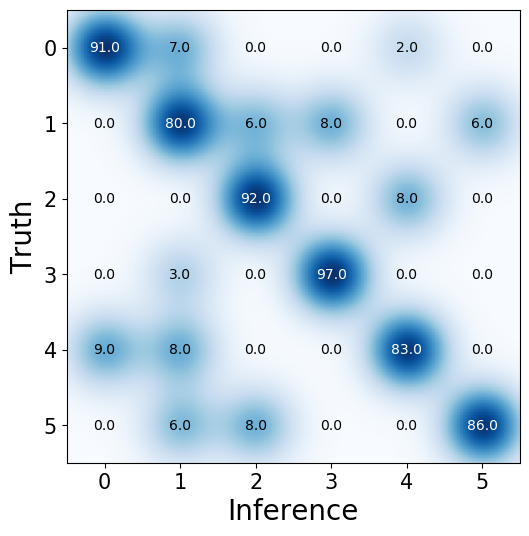

In [3]:
cm = pseudo_matrix  # matrix in percentage
labels = [i for i in range(len(pseudo_matrix))]

# set map
def one_gaussian2d(cx, cy, a, size, width):
    x, y = np.meshgrid(range(size), range(size))
    return a*np.exp(-2*((x-cx)**2+((y-cy)**2))/width**2)

m_log = np.log(cm + 1.)
size = len(cm)

z = np.zeros((100*size, 100*size))
for i in range(size):
    for j in range(size):
        z += one_gaussian2d(50+100*j, 50+100*i, m_log[i, j], 100*size, 40*np.log(size))

        
# set figure
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.set_xticks([50+100*i for i in range(size)])
ax.set_yticks([50+100*i for i in range(size)])
ax.set_xticklabels(labels, fontsize=15)
ax.set_yticklabels(labels, fontsize=15)
ax.set_xlabel('Inference', fontsize=20)
ax.set_ylabel('Truth', fontsize=20)

plt.imshow(z, cmap='Blues')  # here to set cmap

# set text
for i in range(size):
    for j in range(size):
        c = 'k' if round(cm[i, j],2) < 25 else 'w'
        ax.text(
            50+100*j, 50+100*i, round(cm[i, j],2), 
            ha="center", va="center", color=c, fontsize=10
        )

plt.show()